                      ET3112- Image Processing
                      Assignment 3 - Fitting

 Name - K.V.Wickramanayake  
 Index No - D/ENG/21/0073/EE  
 GitHub link - 
                  


Question 01

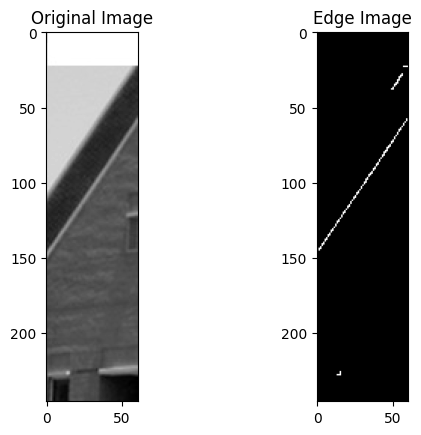

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 

#Loading the image in Fig.1c
img = cv.imread('./building_crop.jpg', cv.IMREAD_GRAYSCALE)

#Applying the Canny edge detector algorithm to the image provided in Fig.1c
edges = cv.Canny(img,350,390)

#Plotting the original image and the edge image using the imshow function
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(edges, cmap='gray')
ax[1].set_title("Edge Image")
plt.show()



Question 02,03,04,05,07,08

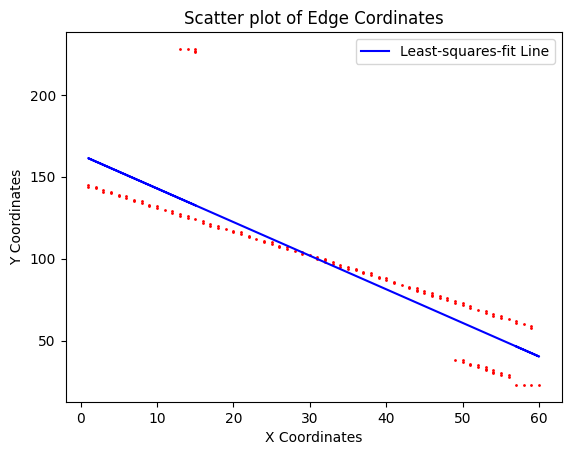

Estimated Roof Angle based on least squares fit (in degrees): -64.00898352832498


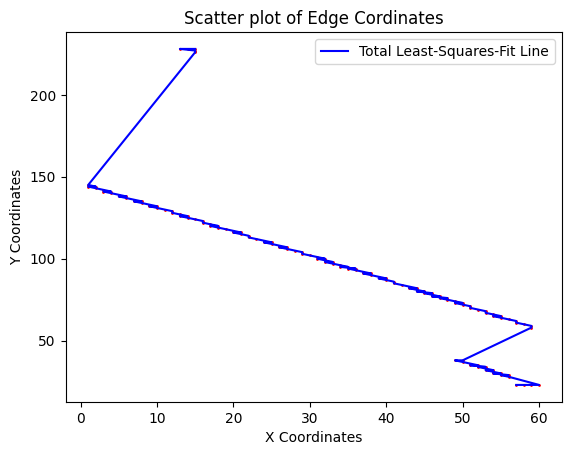

Estimated Roof Angle based on total least squares fit (in degrees): 8.34791864054768e-14


In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 

#Loading the image in Fig.1c
img = cv.imread('./building_crop.jpg', cv.IMREAD_GRAYSCALE)

#Applying the Canny edge detector algorithm to the image provided in Fig.1c
edges = cv.Canny(img,350,390)

#Assigning the extracted features positions to x and y cordinates
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

#Plotting x and y in a scatter plot
plt.scatter(x,y,color='r',s=1)
plt.title('Scatter plot of Edge Cordinates')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')

#Finding the least-squares-fit line
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, m*x + c, 'b', label='Least-squares-fit Line')
plt.legend()
plt.show()

#Estimating the roof angle based on the least squares fit
roof_angle = np.arctan(m) * 180 / np.pi
print('Estimated Roof Angle based on least squares fit (in degrees):', roof_angle)

#Plotting x and y in a scatter plot
plt.scatter(x,y,color='r',s=1)
plt.title('Scatter plot of Edge Cordinates')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')

#Finding the total least-squares-fit-line
A = np.vstack([x, y, np.ones(len(x))]).T
m, n, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, m*x + n*y + c, 'b', label='Total Least-Squares-Fit Line')
plt.legend()
plt.show()

#Estimating the roof angle based on the total least squares fit
roof_angle = np.arctan(m) * 180 / np.pi
print('Estimated Roof Angle based on total least squares fit (in degrees):', roof_angle)




Question 10 - RANSAC Algorithm

Question 11,12

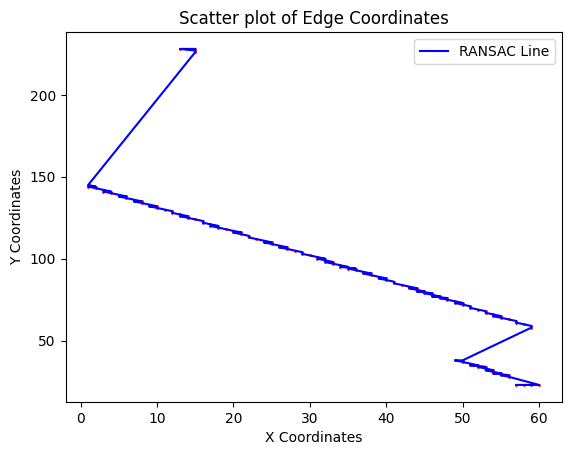

Estimated Roof Angle based on RANSAC (in degrees): 1.558015255321994e-14


In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor

# Loading the image in Fig.1c
img = cv.imread('./building_crop.jpg', cv.IMREAD_GRAYSCALE)

# Applying the Canny edge detector algorithm to the image provided in Fig.1c
edges = cv.Canny(img, 350, 390)

# Assigning the extracted features positions to x and y coordinates
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

# Plotting x and y in a scatter plot
plt.scatter(x, y, color='r', s=1)
plt.title('Scatter plot of Edge Coordinates')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')

# Estimating the roof angle based on RANSAC
ransac = RANSACRegressor()
X = np.vstack([x, y]).T
ransac.fit(X, y)
slope_ransac = ransac.estimator_.coef_[0]
angle_ransac = np.arctan(slope_ransac) * 180 / np.pi
plt.plot(x, ransac.predict(X), 'b', label='RANSAC Line')

plt.legend()
plt.show()

print('Estimated Roof Angle based on RANSAC (in degrees):', angle_ransac)

Question 13  
RANSAC can be more robust to outliers compared to the least-squares-fit and total least-squares-fit methods, as it uses a random sampling approach to identify inliers and outliers and fits the model only to the inliers. This results in more accurate estimations in the presence of noisy or outlier data. 